# DeepSleep 
## Notas
* En Saola hay periodos que no se va a dormir y se une co

## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T

240seg a 10ms

In [28]:
board="saola"
r = 10
ds = 10
TX = 1

batteries = [0.8, 2, 4, 10] #Ah

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

filename = f"../data/dslp--{board}_r{r}_ds{ds}-T{TX}.csv"
print(filename)

df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

../data/dslp--saola_r10_ds10-T1.csv


,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 17:53:13.136065,486828,2025-02-28 17:53:12,5.064,0.0616,0.31194,0.00616
1,1,2025-02-28 17:53:13.146976,486838,2025-02-28 17:53:13,5.088,0.0296,0.15060,0.00296
2,2,2025-02-28 17:53:13.157788,486850,2025-02-28 17:53:13,5.088,0.0296,0.15060,0.00296
3,3,2025-02-28 17:53:13.169053,486861,2025-02-28 17:53:13,5.088,0.0296,0.15060,0.00296
4,4,2025-02-28 17:53:13.179874,486871,2025-02-28 17:53:13,5.088,0.0296,0.15060,0.00296
...,...,...,...,...,...,...,...,...
20977,20977,2025-02-28 17:57:13.080190,726763,2025-02-28 17:57:12,5.088,0.0472,0.24015,0.00472
20978,20978,2025-02-28 17:57:13.091316,726774,2025-02-28 17:57:12,5.088,0.0296,0.15060,0.00296
20979,20979,2025-02-28 17:57:13.101395,726784,2025-02-28 17:57:12,5.088,0.0296,0.15060,0.00296
20980,20980,2025-02-28 17:57:13.113511,726796,2025-02-28 17:57:12,5.088,0.0296,0.15060,0.00296


In [30]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 17:53:13.136065,486828,2025-02-28 17:53:12,5.064,0.0616,0.31194,0.00616
1,1,2025-02-28 17:53:13.146976,486838,2025-02-28 17:53:13,5.088,0.0296,0.15060,0.00296
2,2,2025-02-28 17:53:13.157788,486850,2025-02-28 17:53:13,5.088,0.0296,0.15060,0.00296
3,3,2025-02-28 17:53:13.169053,486861,2025-02-28 17:53:13,5.088,0.0296,0.15060,0.00296
4,4,2025-02-28 17:53:13.179874,486871,2025-02-28 17:53:13,5.088,0.0296,0.15060,0.00296
...,...,...,...,...,...,...,...,...
20977,20977,2025-02-28 17:57:13.080190,726763,2025-02-28 17:57:12,5.088,0.0472,0.24015,0.00472
20978,20978,2025-02-28 17:57:13.091316,726774,2025-02-28 17:57:12,5.088,0.0296,0.15060,0.00296
20979,20979,2025-02-28 17:57:13.101395,726784,2025-02-28 17:57:12,5.088,0.0296,0.15060,0.00296
20980,20980,2025-02-28 17:57:13.113511,726796,2025-02-28 17:57:12,5.088,0.0296,0.15060,0.00296


Text(0.5, 1.0, 'Current')

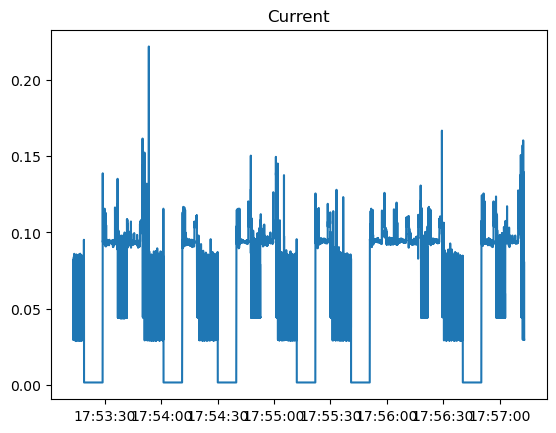

In [31]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

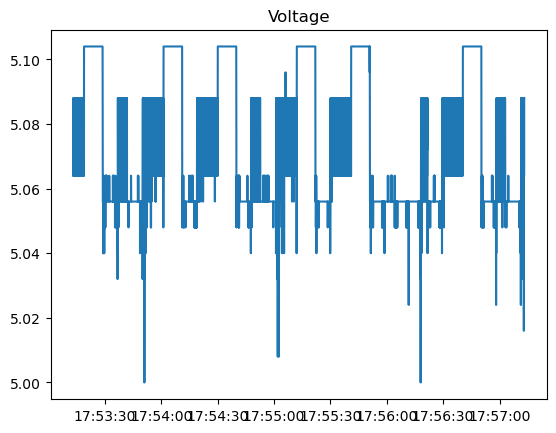

In [32]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [33]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(13.83473712420001)

In [34]:
time_span = max(time_data)
time_span #seg

239.987592

In [35]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.05764771840454156)

## Expected runtime using batteries

In [36]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	13.9 hours,	0.58 days
At 2.00Ah:	34.7 hours,	1.45 days
At 4.00Ah:	69.4 hours,	2.89 days
At 10.00Ah:	173.5 hours,	7.23 days
